NEURAL NETWORKS:
We will use the IRIS dataset to train our model.
Every neural network has input layer, hidden layers(neurons, fully connected or partial), output layer
Use Object Oriented programming for neural networks.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Now create a model class that inherits nn.module, For this:
Input-The 4 features of the flower ----> HL1 (x neurons) ----> HL2(y neurons) ----> Outpur - Gives the flower type
In init: We give parameters as self, input satatypes, the hiddenlayers with given number of neurons and then the number of output features.
We use nn.Linear(firstlayer,secondlayer) --> Data moves from left parameter to the right parameter
We create another function called forward to move this data forward as well
In forward:We Pass self and a x as the parameters
Use F (functional)'s relu i.e rectified linear unit. This says do something ---> If o/p is <0 call it 0 if it's >0 now it goes to that number.
The super__init__ command allows the initialisation of nn.Module

In [2]:
class model(nn.Module):
    def __init__(self,input_features=4,hl1=8,hl2=9,output_features=3):
        super().__init__()
        self.fc1=nn.Linear(input_features,hl1)
        self.fc2=nn.Linear(hl1,hl2)
        self.out=nn.Linear(hl2,output_features)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)
        return x

Now we must create a manual seed, this is because:
1. These models involve randomisation i.e. different random result in each different run
2. Seeding --> We tell the model to start the testing in the same way every time
3. Don't seed the final product, never seed that.
The  number passed as the seed parameter means nothing really, and model() creates an instance.
The parameter doesn't matter but use the same parameter again and again each time otherwise the outputs will differ.
42: The hitcchhiker's guide to galaxy


In [3]:
torch.manual_seed(42)
model=model()

This is the end of model creation NEXT WE TRAIN IT!!

To load and train our model with the IRIS dataset:
Use pandas to load, matplotlib to graph it's accuracy %matplotlib inline will make sure it plots it on the notebook
I changed the last column of strings to integers

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
url = 'https://raw.githubusercontent.com/Dhruxp/MOSSAI/main/Data/iris.csv'
my_df = pd.read_csv(url)
my_df['class']=my_df['class'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

Now we train, test and split. Set x,y ---> x = input features, y = output features
what we do is give x --> The training dataset i.e. the first for columns (DO this by dropping the last column)
Note: Axis = 0 means row, Axis =1 means column
Then convert to numpy arrays because these ML models will only and only care about numbers and raw calculation not about the labels, indexing etc.

In [5]:
X = my_df.drop('class',axis=1)
y = my_df['class']
x_np = X.values
y_np = y.values

Then we import scikit-learn from which we can use train_test_split
now to train the dataset, we give the np arrays + test sixe = some number ex 0.2 i.e. 20% of the data set is the test set everytime.
random_state is like setting a model seed.
Convert x --> float tensors because they have decimal points
Convert y --> long tensor

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_np,y_np,test_size=0.2,random_state=42)
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

From here what we are gonna use is this simple thing call CrossEntropyLoss.
The is an error criterion what it checks is correctness and confidence.
Then it punishes or rewards the model accordingly. So the softmax is calculated for each using the softmaxformula, then it calculates loss using the negative log likelihood formula is the loss is huge it's heavily punished. In ideal case where loss =0, probability is 1 the model is rewarded.
The neural network gives out raw logits (Confident scores) no probabilities.

In [7]:
criterion = nn.CrossEntropyLoss()

Now we use the adam optimiser basically it's a smarter way of using gradient descent
Then we define learning rate i.e. if our model isn't correct after multiple tries slow down it's learning rate

In [8]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

Determine number of epochs: Number of iterations through the entire neural network
Then we just take our losses into an array

In [9]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train) # move forward
    loss = criterion(y_pred,y_train) # calculate loss
    losses.append(loss.detach().numpy()) # store loss for plotting
    if i%10==0:
        print(f'Epoch {i} and loss is {loss.item()}')
    optimizer.zero_grad() # back propagation to fine tune the weights after error calculation
    loss.backward()
    optimizer.step()

Epoch 0 and loss is 1.0846847295761108
Epoch 10 and loss is 0.9183797240257263
Epoch 20 and loss is 0.7622429728507996
Epoch 30 and loss is 0.6273833513259888
Epoch 40 and loss is 0.4667472541332245
Epoch 50 and loss is 0.28770601749420166
Epoch 60 and loss is 0.16738919913768768
Epoch 70 and loss is 0.10598888993263245
Epoch 80 and loss is 0.0802135244011879
Epoch 90 and loss is 0.06947019696235657


Now let's plot these valuse to check for gradient descent and then measure how accurate our model is.
This will give a curve that will let us know about this.

Text(0.5, 0, 'Epochs')

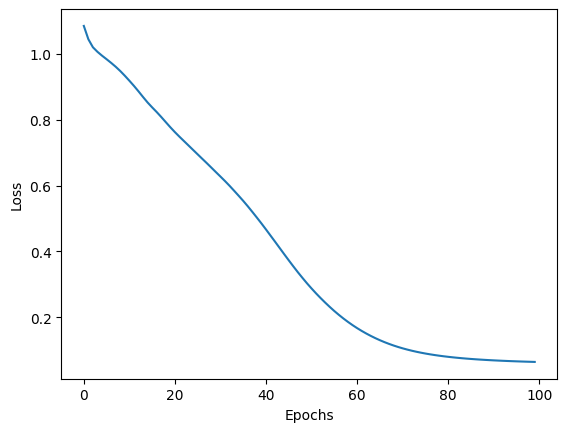

In [10]:
plt.plot(range(epochs),losses)# x,y axis set
plt.ylabel('Loss')
plt.xlabel('Epochs')

Now we can use the testdata set, instead of the training set.
In this no need for back propagation, just need to push it through ---> using torch.no_grad
We made a seperate 20% test set during train_test_split() so we will use that test data now.

In [11]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)
    print(f'Test loss: {loss.item()}')

Test loss: 0.06344014406204224


The test loss is almost similar to the training loss 0.06344 vs 0.06947
To check exactly how the operation works we can print out the o/p at each hidden layer.
The o/p's are basically each class of flower here and the highest number is what it thinks the flower is.
Once it prints is prediction through y_test[i] we can check if the prediction is right or not.
Side by side comparison will be done now

In [12]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1}.) {str(y_val)} \t Actual Value: {y_test[i]} \t Predicted Value: {torch.argmax(y_val)}')
        if torch.argmax(y_val) == y_test[i]:
            correct += 1
    print(f'We got {correct} correct out of {len(y_test)}')

1.) tensor([-1.4120,  6.3132,  2.6088]) 	 Actual Value: 1 	 Predicted Value: 1
2.) tensor([ 8.4023,  2.4573, -7.5391]) 	 Actual Value: 0 	 Predicted Value: 0
3.) tensor([-12.1991,   1.1829,  13.7443]) 	 Actual Value: 2 	 Predicted Value: 2
4.) tensor([-1.6752,  5.9271,  2.8622]) 	 Actual Value: 1 	 Predicted Value: 1
5.) tensor([-1.5887,  6.7559,  2.8371]) 	 Actual Value: 1 	 Predicted Value: 1
6.) tensor([ 7.8451,  2.3289, -7.0010]) 	 Actual Value: 0 	 Predicted Value: 0
7.) tensor([ 1.1273,  6.0707, -0.0493]) 	 Actual Value: 1 	 Predicted Value: 1
8.) tensor([-5.2088,  4.4484,  6.5316]) 	 Actual Value: 2 	 Predicted Value: 2
9.) tensor([-3.2614,  4.9128,  4.4788]) 	 Actual Value: 1 	 Predicted Value: 1
10.) tensor([0.5683, 6.5565, 0.5445]) 	 Actual Value: 1 	 Predicted Value: 1
11.) tensor([-4.3492,  4.7780,  5.6344]) 	 Actual Value: 2 	 Predicted Value: 2
12.) tensor([ 7.3631,  2.0552, -6.5497]) 	 Actual Value: 0 	 Predicted Value: 0
13.) tensor([ 8.1384,  2.3552, -7.2879]) 	 Actual

All of the epochs have given me a correct answer this is shown.
If the accuracy isn't full we need to change the random seed. The loss and epochs will change and an accurate o/p is given

Now we will feed new data into our neural network to predict o/p. As our model is working 30/30 the new data point will now be added by specifying sepal_length,sepal_width,petal_length,petal_width,class, and for this basic outline we will assume we know these numbers so no camera integration here. We do the same thing we did with the testset

In [13]:
new_iris = torch.FloatTensor([[5.1,3.5,1.4,0.2]])
with torch.no_grad():
    pred = model.forward(new_iris)
    print(f'Predicted class for new iris flower is: {torch.argmax(pred)}')

Predicted class for new iris flower is: 0
